# 1) Introduction to Guided Project: Exploring Financial Data using Nasdaq Data Link API

In this project we will explore financial analysis using [Nasdaq Data Link API](https://docs.data.nasdaq.com/docs/in-depth-usage-1)

**Brief API description**: The Nasdaq Data Link API provides a gateway to a wide range of financial data sets, including comprehensive metrics on various companies. We will focus on the `MER/F1` data table, which contains detailed financial information such as **balance sheets**, **cash flow statements**, and **income statements**.



## Project Goal: 

This project will extract financial data for a specific set of companies, with an emphasis on understanding their financial performance over time. 

**We'll examine metrics like ``Accrued Expenses Turnover`` and explore how these values differ among companies and regions.**

`"Accrued Expenses Turnover" `is a key financial efficiency ratio. It measures how often a company pays off its accrued expenses within a certain period, providing insights into:

* **Cash Flow Management**: It indicates how well a company is managing its cash flow in relation to its short-term obligations. A higher ratio suggests efficient management and a strong liquidity position.

* **Operational Efficiency:** This metric can reflect a company's operational efficiency, showing how promptly it settles its short-term debts.

* **Financial Health Indicator:** Regular payment of accrued expenses signifies good financial health and creditworthiness, which is essential for maintaining good supplier relationships and business stability.

In order to achieve this goal, it will be used Python for data retriaval, cleaning and data visualizations.

# 2) API Credentials and Documentation

In order to access Nasdaq API, it is necesary to create an API Key associated with an account.
These are the steps to generate an API Key:

1) Create an Account [here](https://data.nasdaq.com/sign-up)
2) Fill in your details, including your first name, last name, and email address.

3) Once you have the account ready, you should be able to find the API key in your Account Settings under your profile.

4) To keep your API key secure, especially when sharing your Jupyter Notebooks, store it in a separate Python file ( e.g., `config.py`) and import this file into your notebook.

``` Python
import config
api_key = config.API_KEY
```

With your API key in hand, the next task is determining the appropriate API endpoint and the parameters needed to query the financial data. For guidance on constructing your query, refer to the [Nasdaq Data Link API documentation](https://docs.data.nasdaq.com/docs/in-depth-usage-1).

## 2.1 Documentation

**Overview**

The Mergent Global Fundamentals (MF1) data feed provides fundamental indicators on publicly traded companies covered by the Russel Global Index, including historical financial statements (balance sheets, cash flow statements, income statements and ratios) dating back to 2005.

**Delivery**:

The data feed is updated at 02:30 AM UTC, Monday to Friday.
Mergent's primary focus for company updates are U.S. traded companies that file with the SEC. Depending on the company's trading status (U.S. or non-U.S.), filing method (SEC or annual reports), the language of the filing and market filing fluctuations, reporting lag times may vary from 5 to 75 days, with priorities to keep Mergent's U.S. traded universe as up-to-date as possible.

**Coverage**

The Mergent Global Fundamentals data feed covers 50+ fundamental indicators for 15,000+ companies from 67 countries with history dating to 2005 as listed in the Russell Global Index.

A list of all companies covered in this data feed can be downloaded [here](https://static.quandl.com/mergent/mergent-companies.csv).

**Columns Definition**

| **Column Name** | **Description** | **Update Frequency** | **Type** |
|------------------|------------------|------------------------|----------|
| **compnumber** | Internal company identifier; permanent and unique per company. | Permanent number; remains with the company. | integer |
| **reportid** | Report period identifier; unique per company/mapcode/report date combination. Higher duplicate `reportid` may be discarded. | Permanent number; remains with the period. | integer |
| **mapcode** | Identifier of a financial account. Used to map indicators via the Mapcode-to-Indicator mapping. | Updated as needed to reflect accounting standard or reporting method changes. | integer |
| **amount** | Indicator value associated with the mapcode. | Updated when analysts update annual and quarterly profiles. | decimal(36,14) |
| **reportdate** | Date of the financial report period. | Same as reportdate updates. | date |
| **reporttype** | Type of report (e.g., annual, quarterly). | Same as reportdate updates. | string |
| **auditorstatus** | Code indicating the audit status of the report. | Same as reportdate updates. | string |
| **currency** | ISO currency code of the report. | Same as reportdate updates. | string |
| **consolidated** | Indicates whether the report is consolidated. | Same as reportdate updates. | string |
| **longname** | Official company name. | Updated as needed (e.g., reorganizations, name changes). | string |
| **shortname** | Common or abbreviated company name. | Updated as needed. | string |
| **status** | Company operating status (active/inactive). | Updated as needed. | string |
| **countrycode** | ISO country code of incorporation. | Updated as needed (e.g., reincorporation). | string |
| **cik** | SEC Central Index Key. | Permanent numeric identifier. | integer |
| **mic** | Mergent industry classification code. | Updated as needed when business line changes. | string |
| **ticker** | Stock ticker for the primary listing. | Updated as needed. | string |
| **exchange** | Exchange where the company is listed. | Updated as needed. | string |
| **city** | City of headquarters address. | Updated as needed (relocations). | string |
| **statecode** | State/region code of the address. | Same as address updates. | string |
| **country** | ISO country code of the company’s address. | Same as address updates. | string |
| **zipcode** | Postal or ZIP code. | Same as address updates. | string |
| **phonenumber** | Company telephone number. | Same as address updates. | string |
| **website** | Company website. | Same as address updates. | string |
| **fye** | Fiscal year end. | Annual update. | date |
| **indicator** | Indicator name | | string |
| **Statement** | Financial statement, e.g. cash flow, balance sheet, etc | | String |





**Mapcode to Indicator Mapping**

The table below shows a short list of indicators and the mapping between the integer identifiers in the mapcode.

| **Mapcode** | **Indicator** | **Statement** |
|-------------|----------------|----------------|
| **-3887** | Total Revenue | Income Statement |
| **-984** | EBITDA | Income Statement |
| **-4524** | Operating Income | Income Statement |
| **-3994** | Net Income | Income Statement |
| **-5370** | Revenue Per Share | Income Statement |
| **-3851** | EPS – Net Income – Basic | Income Statement |
| **-4023** | EPS – Net Income – Diluted | Income Statement |
| **-4043** | Shares Outstanding | Income Statement |
| **-4021** | Weighted Avg Shares Outstanding – Basic | Income Statement |
| **-4022** | Weighted Avg Shares Outstanding – Diluted | Income Statement |
| **-4041** | Current Assets | Balance Sheet |
| **-873** | Total Assets | Balance Sheet |





## 2.2 Composition of a CALL:

According to API documentation, the base url link is the following: `curl "https://data.nasdaq.com/api/v3/datatables/MER/F1.xml?&mapcode=-5370&compnumber=39102&reporttype=A&qopts.columns=reportdate,amount&api_key=<YOURAPIKEY>`

| **URL COMPONENT** | **EXPLANATION** |
|-------------------|-----------------|
| `https://data.nasdaq.com/api/v3/datatables/MER/F1.json` | This portion of the call queries the MER/F1 table and returns the data in json format. |
| `mapcode=-5370` | This filter removes everything except for where the mapcode = -5370 (this is the identifier used by Mergent for revenue per share). |
| `compnumber=39102` | This filter removes everything except for the rows where compnumber = 39102 (39102 = Nokia). |
| `reporttype=A` | This filter removes everything except for the rows showing records for the "annual" report type (A = annual). |
| `qopts.columns=reportdate,amount` | This argument filters the data based on the “report date” and “amount” columns. |
| `api_key=<YOURAPIKEY>` | This part of the call authenticates you as a Nasdaq Data Link user. Replace `<YOURAPIKEY>` with your personal API key. |


### Filter Operators 

| **Filter** | **Required** | **Description** |
|-----------|--------------|-----------------|
| `=`       | yes          | Modifies the parameter to return values **equal to** the requested value. |
| `.gt=`    | no           | Modifies the parameter to return values **greater than** the requested value. |
| `.lt=`    | no           | Modifies the parameter to return values **less than** the requested value. |
| `.gte=`   | no           | Modifies the parameter to return values **greater than or equal to** the requested value. |
| `.lte=`   | no           | Modifies the parameter to return values **less than or equal to** the requested value. |

### Optional Parameters

| **Parameter / Example**                           | **Required** | **Description** |
|---------------------------------------------------|--------------|-----------------|
| `qopts.columns`                                   | no           | Request data from specific columns. For multiple columns, separate names with commas. |
| `qopts.export`                                    | no           | Packages the requested data into a ZIP file (useful for large queries). |
| `qopts.per_page`                                  | no           | Limits the number of rows returned per request (max 10,000). |
| `qopts.cursor_id`                                 | no           | Cursor used for pagination. A null cursor means the last page of results. |
| `qopts.per_page=10`                               | —            | Example: limits rows per request to **10**. |
| `ticker=SPY`                                      | —            | Example: filters rows where the `ticker` column equals **SPY**. |
| `qopts.columns=ticker, date, shares_outstanding`  | —            | Example: selects only the columns **ticker**, **date**, **shares_outstanding**. |
| `ticker=SPY, IWM, GLD`                            | —            | Example: filters for **multiple ticker values**. |


### Rate Limits

* Users who are not appending any API key to their Tables API call (ie. “anonymous users”) have a combined limit of **20 calls per 10 minutes** and **50 calls per day**. These limits are applied globally to all anonymous users. If you need higher API rate limits, we recommend appending your API key to your API calls.

* Users who are not subscribed to any premium data, but who are appending their API key to their API call, have a limit of **300 calls per 10 seconds**, **2.000 calls per 10 minutes** and a limit of **50.000 calls per day**. Authenticated users have a concurrency limit of one; that is, they can make one call at a time and have an additional call in the queue.

* Premium data subscribers who are subscribed to at least one tables dataset, and who are appending their API key to their API call, have a limit of **5.000 calls per 10 minutes** and a limit of **720.000 calls per day**.

* Premium data subscribers who are bulk downloading an entire table using the qopts.export_true parameter may only use qopts.export=true 60 times in one hour.


# 3) Working with the Endpoint and Parameters to Query the API

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

import config

In [9]:
#API endpoint URL
url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

#parameters dictionary
params = {
    'qopts.per_page':1,
    'api_key':config.API_KEY
}
    
#request data from API server
response = requests.get(url, params=params)
#convert response to JSON
json_data = response.json()




## 3.1 Read json request

the get.request send back an output in JSON format. in order to get the first element of JSON dictionary we should use the following sentence:

``json_data['datatable']['data'][0]``

In [10]:
print(len(json_data))

#print all keys in the 'data' section of the JSON response
print(json.dumps(json_data['datatable'], indent=4)) #pretty print the JSON data


2
{
    "data": [
        [
            2438,
            1868192544,
            -1802,
            10.481948,
            "2011-06-30",
            "Q2",
            "U",
            "EUR",
            "True",
            "Deutsche Bank AG",
            "Deutsche Bank AG",
            "Active",
            "DEU",
            "Europe",
            1159508,
            "5.1.1",
            "DB",
            "NYS",
            "Taunusanlage 12",
            null,
            null,
            null,
            "Frankfurt am Main",
            null,
            "DEU",
            "60325",
            "(49) 69 910 00",
            "(49) 69 910 34 225",
            "www.db.com",
            "2024-12-31",
            "Accrued Expenses Turnover",
            "Derived"
        ]
    ],
    "columns": [
        {
            "name": "compnumber",
            "type": "Integer"
        },
        {
            "name": "reportid",
            "type": "Integer"
        },
        {
            "na

**json_data insights**

we can see from the previous output that json_data is a dictonary composed by 2 elements:

* datatable: here we can see the requested output itself. containing all the relevant information for data analysis (dict keys and columns)

* meta: Next_cursor_id - It is a field to paginate through the output

**Json_data Structure**

From the output above it is possible to see that the structure os json['datatable'] is divided in two parts:

* Data: containing the values

* columns: here it shows the correponding columns for the previous values

e.g.:

``` Json
    {
    "data": [
        [
            2438,
            1868192544,
            -1802,
            10.481948,
            "2011-06-30",
            "Q2",
            "U",
            "EUR",
            "True",
            .....

    "columns": [
            {
                "name": "compnumber",
                "type": "Integer"
            },
            {
                "name": "reportid",
                "type": "Integer"
            },
            {
                "name": "mapcode",
                "type": "Integer"
            },
            {
                "name": "amount",
                "type": "BigDecimal(36,14)"
            },
            {
                "name": "reportdate",
                "type": "Date"

            }
```


# 4) Processing JSON Data into a Dataframe

Now that we understood how data API outputs is structured, let's convert the response into a pandas.Dataframe.

To do that, let's update the `parameters` dictionary to return `10.000` rows, extract the `data` and `columns` names and create a `Dataframe` from this information

## 4.1 - Send request.get

In [37]:
#API endpoint URL
url = 'https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

#parameters dictionary
params = {
    'qopts.per_page':10000,
    'api_key':config.API_KEY
}
    
#request data from API server
response = requests.get(url, params=params)
#convert response to JSON
json_data = response.json()

## 4.2 - Extract data and column names, then create a Dataframe

In [38]:
data = json_data['datatable']['data']
column_names = [col['name'] for col in json_data['datatable']['columns']]

#create DataFrame
df_metric = pd.DataFrame(data, columns=column_names)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived


# 5) Understanding the Dataset

Now it is time to manipulate the pandas Dataframe with Exploratory Data Analysis (EDA). Here it is an important step to comprehend the most important columns to our analysis and our goal which is: 

1. Analyze the financial trend of 'accrued expenses turnover' over a period for various companies, particularly **banks**.

1. To examine how different regions contribute to these financial metrics.

Knowing from documentation above all columns definitions, the next step is using `info()` method and determine the specfic columns for our analysis.


In [39]:

df_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

From the information and documentation above , We've selected the following columns to our analysis:

* `indicator`;
* `mapcode`;
* `country`;
* `longname`;
* `reportdate`;
* `reporttype`;
* `amount`

# 6) Filtering Dataframe for Analysis

After choosing the necessary columns, the next step is to filter our dataframe using indicator == `'Acrued Expenses Turnover'`

In [40]:
necessary_columns = ['indicator','country','longname','reportdate','reporttype','amount']

filtered_df = df_metric[necessary_columns][df_metric['indicator']=='Accrued Expenses Turnover']
filtered_df.head()

,indicator,country,longname,reportdate,reporttype,amount
0,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-06-30,Q2,10.481948
1,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-09-30,Q3,8.161754
2,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-06-30,Q2,10.788213
3,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-09-30,Q3,9.437545
4,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2013-06-30,Q2,8.755041


In [41]:
filtered_df['indicator'].value_counts() #check if filtering worked

indicator
Accrued Expenses Turnover    139
Name: count, dtype: int64

In [42]:
filtered_df.describe()

,amount
count,139.000000
mean,26.908762
std,33.097291
min,4.689773
25%,9.675670
50%,13.753753
75%,31.777614
max,229.810427


We can see from describe() above that  total `Accrued Expenses Turnover` varies from 4.689 to 229.810 which is a big variation. 

The mean is `26.908` with a Standard Deviation of `33.097`

We should analyse which country/region contributes more or less for those numbers.

# 7) Enhacing the Dataframe

Enhancing the readability and information quality of our DataFrame is crucial for clear analysis and reporting. We will focus on two enhancements: adding a column with full country names and cleaning up the column names.

* **Full Country Names**: The current country column uses abbreviations, which might not be immediately recognizable. Including full country names makes the data more understandable and accessible, especially for those unfamiliar with country codes.

* **Column Name Cleaning:** Using consistent naming conventions, like snake_case, improves code readability and maintainability. Renaming 'longname' to 'company_name' clarifies the column's purpose.

We'll use the apply() method on the country column to create a new column with full country names. This method allows us to apply a custom operation to each element in a column.

But let's create a simple dictionary to map country abbreviations to full names: 



In [43]:
country_mapping = {
    'USA': 'United States of America',
    'DEU': 'Germany',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'BHS': 'Bahamas',
    'IRL': 'Ireland'
   
}

In [45]:
#define a function to map country name and return its full name
#necessary_columns = ['indicator','country','longname','reportdate','reporttype','amount']
def map_country(country_name):
    if country_name in country_mapping:
        return country_mapping[country_name]
    else:
        return country_name
    
filtered_df['country_name'] = df_metric['country'].apply(map_country)
filtered_df.columns = ['indicator','country','company_name','report_date','report_type','amount','country_name']
updated_df = filtered_df.copy()

updated_df.head()

,indicator,country,company_name,report_date,report_type,amount,country_name
0,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-06-30,Q2,10.481948,Germany
1,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-09-30,Q3,8.161754,Germany
2,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-06-30,Q2,10.788213,Germany
3,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-09-30,Q3,9.437545,Germany
4,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2013-06-30,Q2,8.755041,Germany


In [46]:
updated_df['country_name'].value_counts()

country_name
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
GBR                          4
Name: count, dtype: int64

# 8) Understading Financial Trends Over Time

Understanding financial trends over time is vital for sound business analysis and decision-making. In this section, we concentrate on extracting relevant data for a specific time **period(2010-2015)** and visualizing trends using matplotlib, a powerful plotting library in Python.

**Key Concepts**

* **Time Period Filtering:** Narrowing down the dataset to a specific, relevant time frame, such as 2010-2015.

* **Column Selection:** Choosing essential columns like 'company_name', 'report_date', and 'amount' for focused analysis.

* **Trend Visualization:** Using matplotlib to create line plots illustrating how financial metrics change over the selected period.

But first we need to ensure that `report_date` is in the correct format of `datetime`


In [61]:
# Convert 'report_date' to datetime and filter for 2010-2015
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]
updated_df.head()

,indicator,country,company_name,report_date,report_type,amount,country_name
0,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-06-30,Q2,10.481948,Germany
1,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2011-09-30,Q3,8.161754,Germany
2,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-06-30,Q2,10.788213,Germany
3,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2012-09-30,Q3,9.437545,Germany
4,Accrued Expenses Turnover,DEU,Deutsche Bank AG,2013-06-30,Q2,8.755041,Germany


In [66]:
relevant_data.describe()   

,report_date,amount
count,139,139.000000
mean,2013-06-15 07:04:44.892086272,26.908762
min,2010-12-31 00:00:00,4.689773
25%,2012-01-30 00:00:00,9.675670
50%,2013-06-29 00:00:00,13.753753
75%,2014-09-28 12:00:00,31.777614
max,2015-12-31 00:00:00,229.810427
std,NaN,33.097291


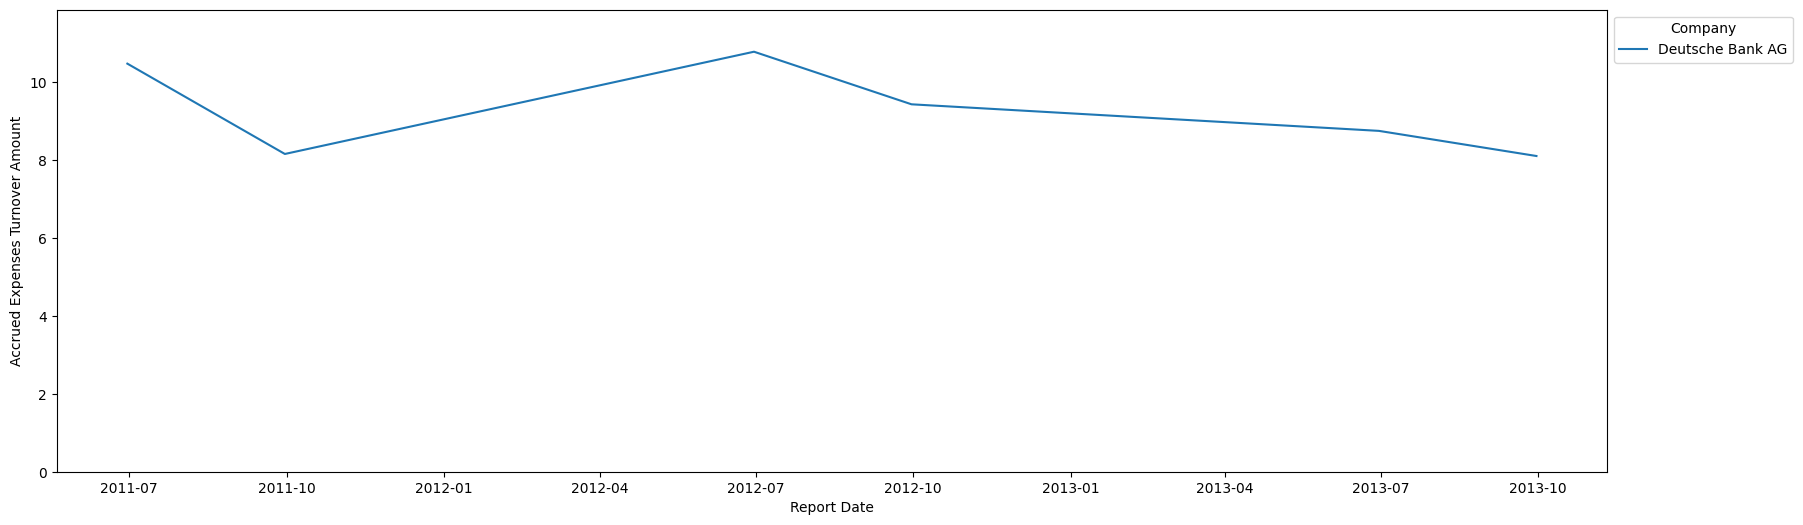

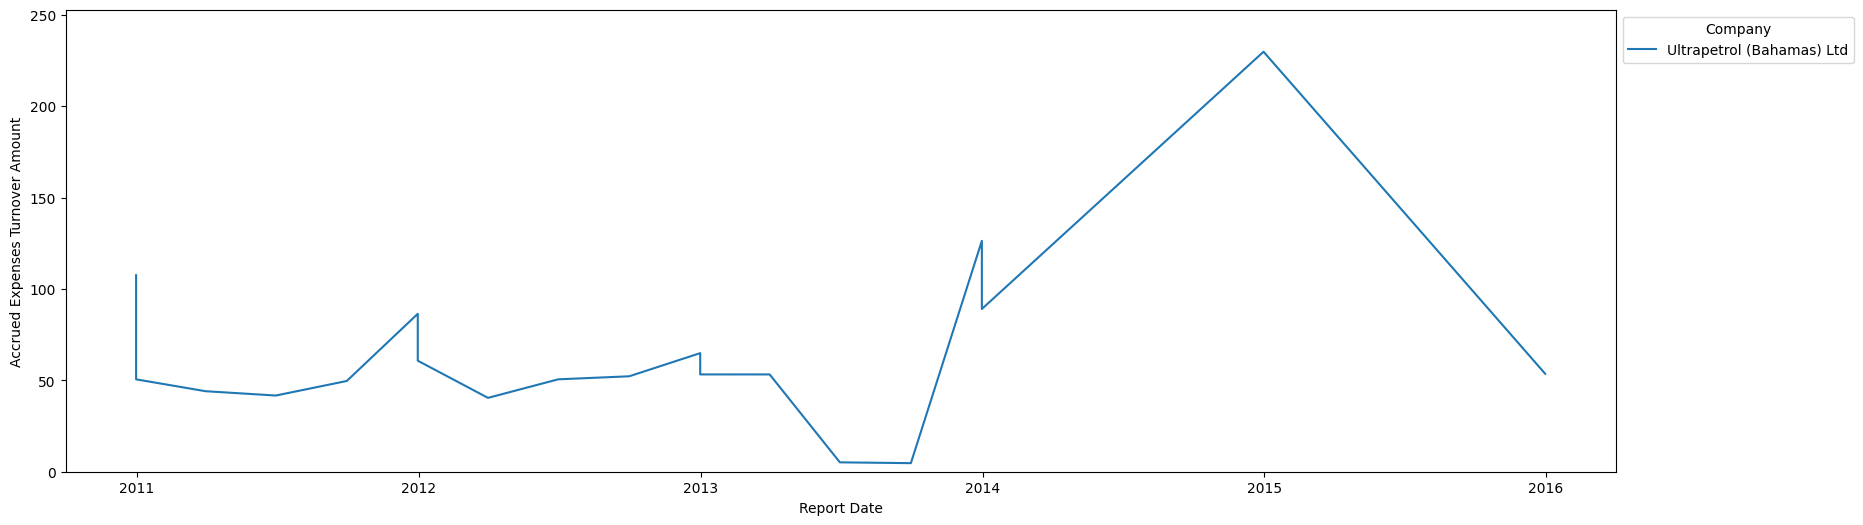

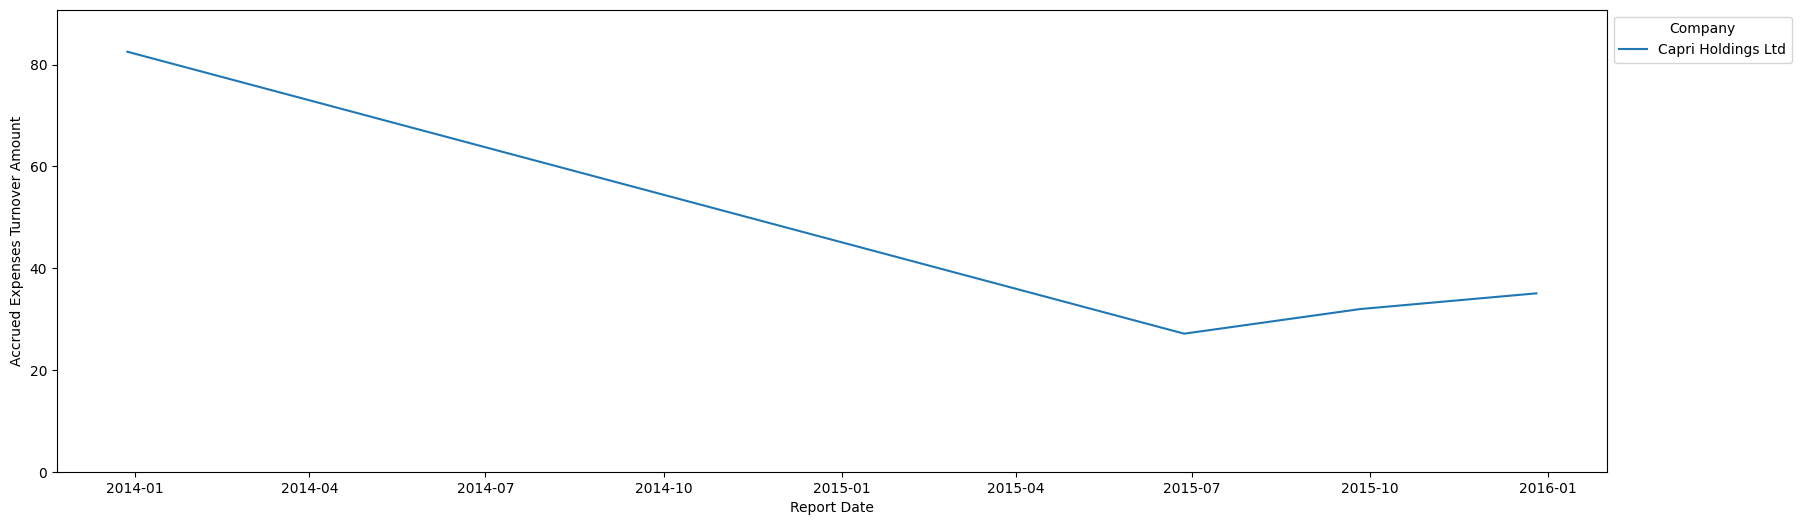

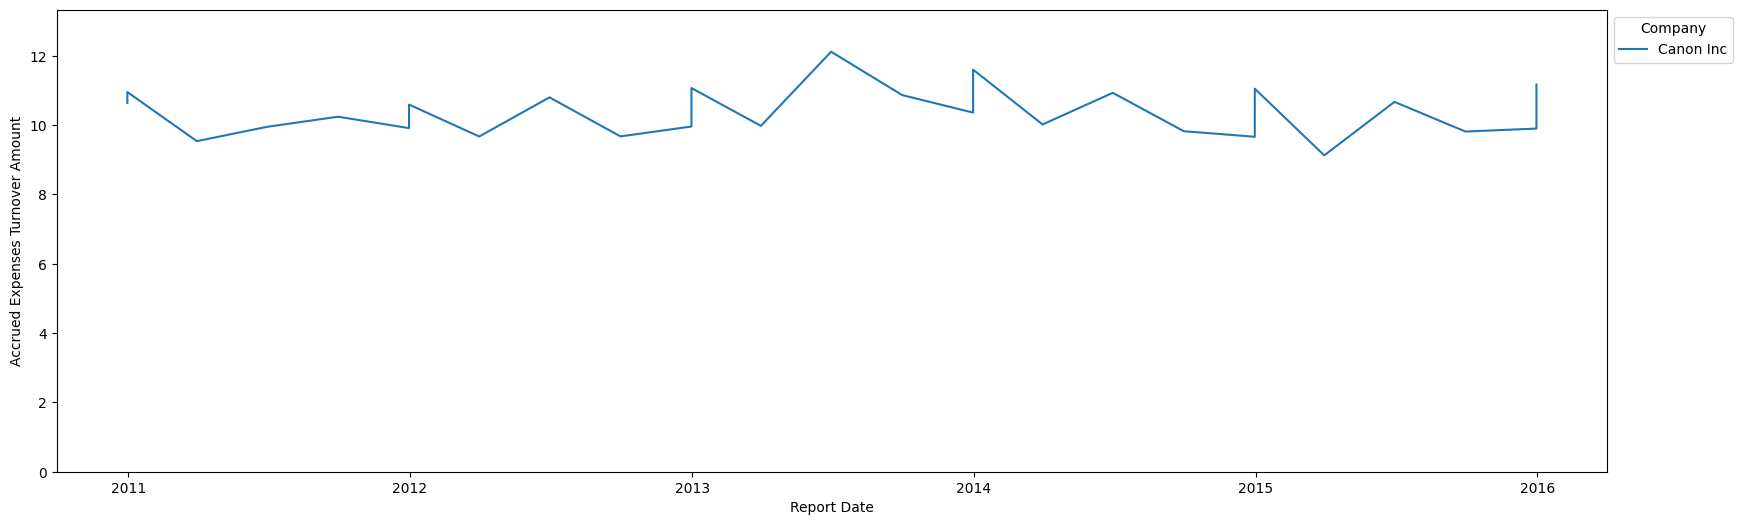

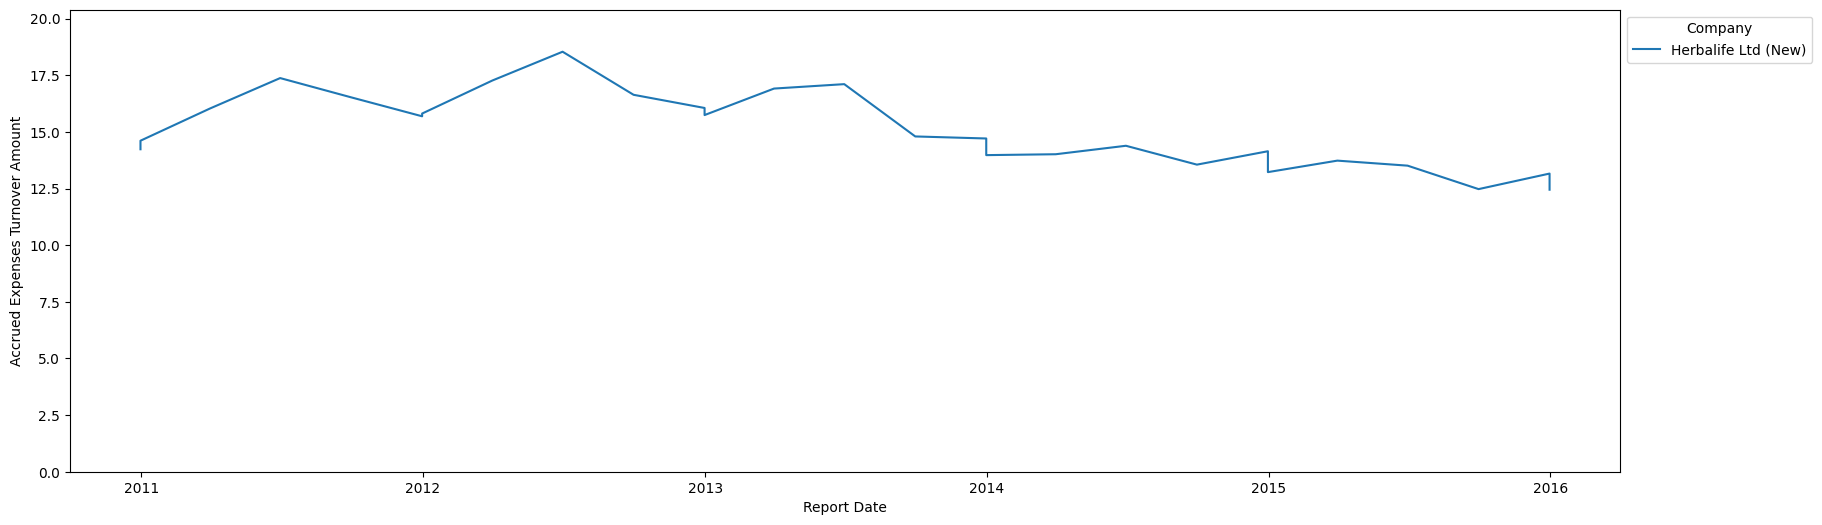

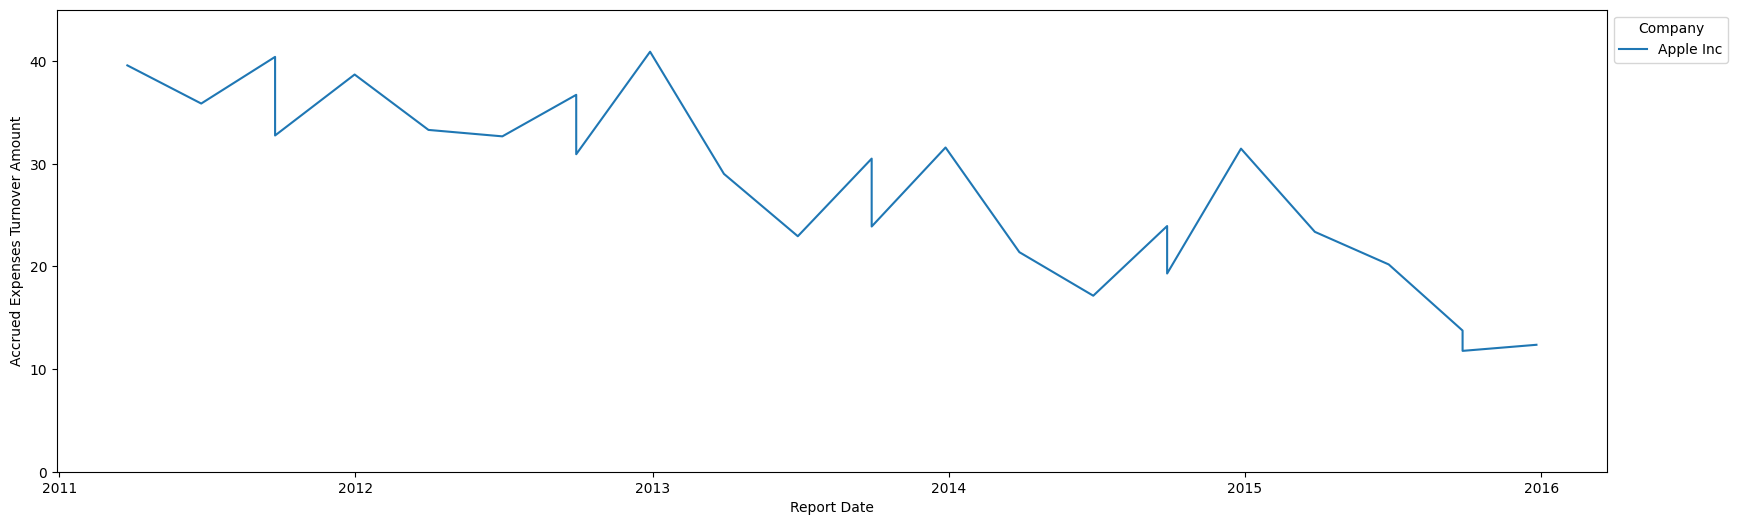

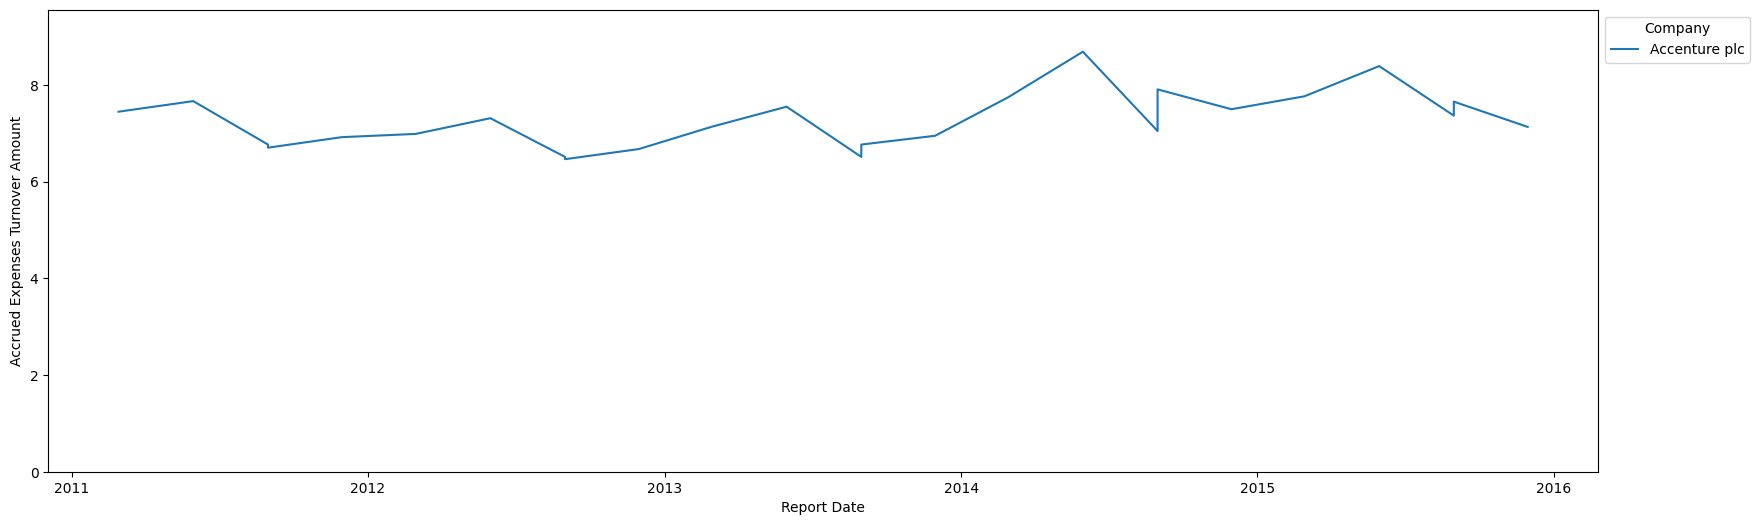

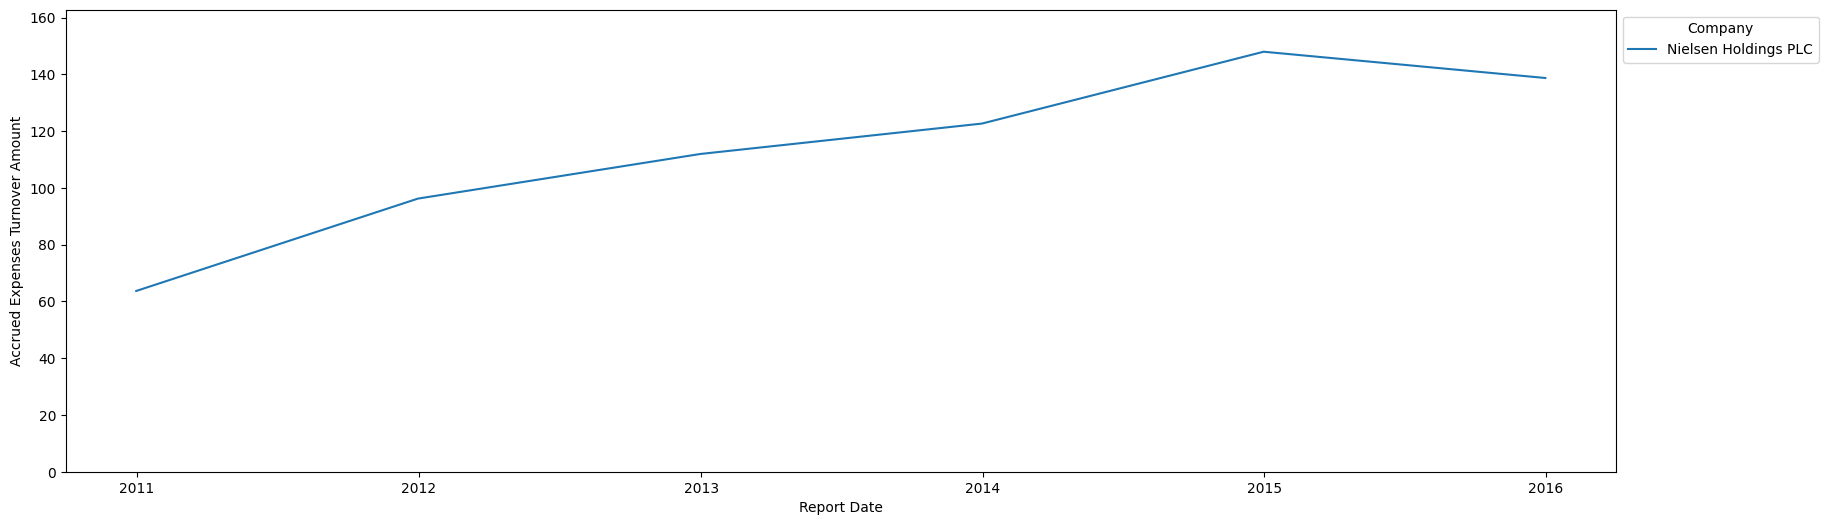

In [70]:
#select only relevant columns for trend over time analysis
relevant_data = updated_df[['company_name','country','report_date','amount']]

#loop over each company_name of relevant_data

for company in relevant_data['company_name'].unique():
    plt.figure(figsize = (20,6)) #create a figure  15 inches wide and 6 inches tall
    company_data = relevant_data[relevant_data['company_name'] == company]
    plt.plot(company_data['report_date'], company_data['amount'], label=company)
    plt.ylim(0, company_data['amount'].max() * 1.1) #set y-axis limits
    plt.xlabel('Report Date')
    plt.ylabel('Accrued Expenses Turnover Amount')
    plt.legend(title='Company', bbox_to_anchor=(1.00, 1), loc='upper left' )
    plt.show()

**Insights**:

highlighting their Accrued Expenses Turnover from 2010 to 2015. The graph depicts each company's financial efficiency, with lines tracing how frequently they managed to pay off their accrued expenses over the six-year period. While some companies show dramatic variances, like UltraPetrol (Bahamas) with a significant spike in 2014, others, like Apple Inc. and Accenture plc, display more stable trends. This visualization allows us to compare and analyze the companies' financial practices and efficiency in managing short-term liabilities during the observed years.



# 9) Geographic Region Analysis

After successfully visualizing financial trends over time, we now shift our focus to analyzing data based on **geographical regions**. This involves grouping data to understand how different regions contribute to the financial metrics.

Understanding the performance of different geographical regions and stock exchanges is crucial in global financial analysis. It allows us to identify which regions are performing well and which may need more attention or investment.

**Key Concepts**

* **Geographical Region Analysis:** Grouping data by country and calculating metrics such as the average financial amount enables a deep understanding of regional performance, highlighting disparities and trends across different markets. This method is essential in global financial analysis, offering insights into each region's economic impact and guiding strategic business decisions and resource allocation based on regional strengths and weaknesses